In [ ]:
# Por si alguien corre en python2
from __future__ import division

# Preparamos todo para correr
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline


# Ejercicio 1: Aplicación de los algoritmos vistos a dos datasets

 Clasifique los siguientes Datasets utilizando un Perceptron y un Regresor Logístico. Encuentre los coeficientes $w$ para el caso de dos clases, con la frontera de decisión y la tasa de misclasificación con ambos métodos. Para esto último, utilice el método de K-Folding.

Discuta que diferencia hay entre ambos datasets y como impacta esto a la performance de los algoritmos. ¿Qué puede lograr moviendo el umbral?

**a.** Dataset 1

In [ ]:
from scipy.stats import  multivariate_normal
X1=multivariate_normal.rvs(size=100,mean=[0,7],cov=[[1,0.0],[0.0, 1]])
X2=multivariate_normal.rvs(size=100,mean=[2,4],cov=[[2,0.0],[0.0, 1]])
plt.scatter(X1[:,0],X1[:,1],color='blue')
plt.scatter(X2[:,0],X2[:,1],color='red')
plt.xlim((-3,10))
plt.ylim((-1,10))

**b.** Dataset 2

In [ ]:
from scipy.stats import  multivariate_normal
X1=multivariate_normal.rvs(size=100,mean=[0,7],cov=[[1,0.0],[0.0, 1]])
aux1=multivariate_normal.rvs(size=90,mean=[2,4],cov=[[2,0.0],[0.0, 1]])
aux2=multivariate_normal.rvs(size=10,mean=[9,0],cov=[[0.2,0.0],[0.0, 0.1]])
X2=np.zeros(X1.shape)
X2[:,0]=np.append(aux1[:,0],aux2[:,0])
X2[:,1]=np.append(aux1[:,1],aux2[:,1])
plt.scatter(X1[:,0],X1[:,1],color='blue')
plt.scatter(X2[:,0],X2[:,1],color='red')
plt.xlim((-5,10))
plt.ylim((-1,10))

# Ejercicio 2: Funciones de base

Veamos un caso en el que los datos son en apariencia no linealmente separables. 

In [ ]:
phi=-np.pi+2*np.pi*np.random.rand(100)
L=int(len(phi)/2)
r1=np.random.rand(L)
r2=1.0+2.0*np.random.rand(L)
T=np.zeros(2*L)
X=np.zeros((2*L,2))
for i in range(L):
  X[i,0]=r1[i]*np.cos(phi[i])
  X[i,1]=r1[i]*np.sin(phi[i])
  T[i]=1.0
  X[L+i,0]=r2[i]*np.cos(phi[L+i])
  X[L+i,1]=r2[i]*np.sin(phi[L+i])
plt.scatter(X[:L,0],X[:L,1],color='blue')
plt.scatter(X[L:,0],X[L:,1],color='red')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

**a** Trate de clasificar los datos utilizando Regresion Logistica como en los ejercicios anteriores. Obtenga la matriz de confusion. ¿Qué observa?

**b** Haga el cambio de base a coordenadas polares:

$r = \sqrt{x^{2}_{1}+x^{2}_{2}}$

$\phi = \text{Arctan}\left(\frac{x_{2}}{x_{1}}\right)$

Para lo segundo, utilize la funcion `np.arctan2`. Grafique y entrene un Regresor Logistico en esta nueva base. ¿Qué encuentra?

**c** Grafique la frontera de decision en la base original.

# Ejercicio 3: GridSearchCV para Clasificación

Considere el siguiente dataset:

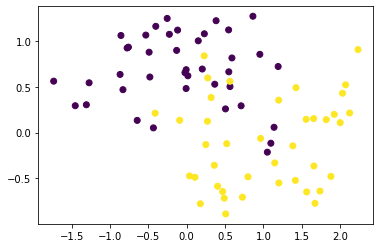

In [ ]:
np.random.seed(42)
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=80, shuffle=True,noise=0.3)
plt.scatter(X[:,0],X[:,1],c=y)

Divida en entrenamiento y testeo con proporción 50%. Utilizando funciones de base polinomiales y un regresor logístico con penalización `l2`, encuentre el mejor polinomio (fije `C` a 1.0) utilizando de una a la vez exactitud `accuracy`, precisión `precision` y exhaustividad `recall` (para esto haga uso del `scoring` de `GridSearchCV`). 

Para cada uno de los tres polinomios, calcule la matriz de confusión sobre el conjunto de testeo. Interprete los resultados.

# Ejercicio 4: Clasificación multiclase en el dataset de Iris

A continuación utilizaremos el famoso dataset de Iris, tomado del paper de Fisher del 1936 en donde lo utilizó por primera vez para ejemplificar el uso del análisis determinante lineal. 

El dataset consiste de 150 muestras de 3 tipos distintos de flor Iris, 50 muestras de cada una. Cada muestra consiste de las medidas (en cm) del ancho y largo del pétalo y sépalo de una flor. 

Su trabajo es entrenar un modelo que correctamente clasifique de qué tipo es una flor Iris, dadas sus medidas de ancho y largo de sus pétalos y sétalos. Para esto, explore y juegue con los modelos vistos hasta ahora. Cuando termine, de una estimación objetiva de la ``accuracy`` esperada de su modelo. 

*Bonus: intente identificar si entre las tres clases alguna o todas son o no linealmente separables.*

In [ ]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

Ahora suponga que en que usted es alergico a una de las tres flores, la Setosa. Utilice una matriz de perdida sobre el mejor modelo que tenga y obtenga una nueva matriz de confusion.